In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
venues_df = pd.read_csv('../data/venues.csv')
print(venues_df.shape)
users_df = pd.read_csv('../data/users.csv')
checkins_df = pd.read_csv('../data/checkins.csv')
retail_venues_df = pd.read_csv('../data/retail_venues.csv')
print(retail_venues_df.shape)

(247473, 6)
(108025, 5)


In [9]:
counts = venues_df.primary_category.value_counts()
m = {}
for c in counts.index:
    m[c] = venues_df[venues_df.primary_category == c].category.value_counts().index

In [10]:
m

{'Food': Index(['Restaurant', 'American Restaurant', 'Pizza Place', 'Café', 'Gastropub',
        'Burger Joint', 'Italian Restaurant', 'Seafood Restaurant', 'BBQ Joint',
        'Mexican Restaurant',
        ...
        'Ch\'ti Restaurant', 'Takoyaki Place', 'Sukiyaki Restaurant',
        'Goan Restaurant', 'Bougatsa Shop', 'Emilia Restaurant',
        'Campanian Restaurant', 'Yucatecan Restaurant', 'Romagna Restaurant',
        'Wagashi Place'],
       dtype='object', length=263),
 'Nightlife Spot': Index(['Bar', 'Brewery', 'Pub', 'Beer Bar', 'Beer Garden', 'Sports Bar',
        'Cocktail Bar', 'Lounge', 'Dive Bar', 'Wine Bar', 'Nightclub',
        'Hotel Bar', 'Speakeasy', 'Other Nightlife', 'Hookah Bar', 'Beach Bar',
        'Strip Club', 'Gay Bar', 'Karaoke Bar', 'Whisky Bar', 'Tiki Bar',
        'Sake Bar', 'Rooftop Bar', 'Night Market', 'Champagne Bar', 'Ice Bar',
        'Gastropub', 'BBQ Joint', 'Restaurant', 'American Restaurant'],
       dtype='object'),
 'Outdoors & Recreati

In [31]:
cat_m = {}
for key in m:
	cur_categories = m[key]
	for category in cur_categories:
		if category in cat_m:
			cat_m[category].append(key)
		else:
			cat_m[category] = [key]

In [32]:
cat_m

{'Restaurant': ['Food', 'Nightlife Spot'],
 'American Restaurant': ['Food', 'Nightlife Spot', 'Other'],
 'Pizza Place': ['Food'],
 'Café': ['Food'],
 'Gastropub': ['Food', 'Nightlife Spot'],
 'Burger Joint': ['Food'],
 'Italian Restaurant': ['Food'],
 'Seafood Restaurant': ['Food'],
 'BBQ Joint': ['Food', 'Nightlife Spot'],
 'Mexican Restaurant': ['Food'],
 'Steakhouse': ['Food'],
 'German Restaurant': ['Food'],
 'Coffee Shop': ['Food'],
 'Irish Pub': ['Food'],
 'Sushi Restaurant': ['Food'],
 'Asian Restaurant': ['Food'],
 'Fast Food Restaurant': ['Food'],
 'New American Restaurant': ['Food'],
 'Bistro': ['Food'],
 'Japanese Restaurant': ['Food'],
 'Chinese Restaurant': ['Food'],
 'Wings Joint': ['Food'],
 'Bakery': ['Food'],
 'Breakfast Spot': ['Food'],
 'Diner': ['Food'],
 'Indian Restaurant': ['Food'],
 'Caucasian Restaurant': ['Food'],
 'Food Court': ['Food'],
 'French Restaurant': ['Food'],
 'Sandwich Place': ['Food'],
 'Eastern European Restaurant': ['Food'],
 'Tapas Restaurant':

In [ ]:
venues_df.primary_category.nunique()

In [5]:
venues_df[(venues_df.country == 'Россия') & (venues_df.primary_category == 'Nightlife Spot')].category.value_counts()[:10]

Bar                1478
Beer Bar           1211
Pub                 782
Brewery             399
Hookah Bar          296
Nightclub           250
Cocktail Bar        169
Other Nightlife     165
Lounge              151
Wine Bar            148
Name: category, dtype: int64

In [6]:
venues_df[(venues_df.country == 'Россия') & (venues_df.primary_category == 'Food')].category.value_counts()[:10]

Café                    1256
Restaurant               983
Gastropub                475
Burger Joint             431
Pizza Place              402
Caucasian Restaurant     375
Coffee Shop              374
BBQ Joint                346
Fast Food Restaurant     298
Italian Restaurant       270
Name: category, dtype: int64

In [7]:
venues_df[(venues_df.country == 'Россия') & (venues_df.primary_category == 'Shop & Service')].category.value_counts()[:10]

Beer Store            1086
Salon / Barbershop     600
Supermarket            548
Food & Drink Shop      451
Convenience Store      420
Liquor Store           335
Shopping Mall          313
Grocery Store          297
Wine Shop              238
Bath House             188
Name: category, dtype: int64

# Предпочтения разных групп пользователей касательно мест употребления и покупки пива

In [27]:
N_TOP_POSITIONS = 5
FULL_RESIDENCY_CATEGORY = 'Residential Building (Apartment / Condo)'
COMPACT_RESIDENCY_CATEGORY = 'Residential Building'

def popular_venues_primary_categories_of_users_group(min_total_beers_threshold, max_total_beers_threshold, venue_country=None):
	venue_ids_of_filtered_users = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers > min_total_beers_threshold) & (users_df.total_beers < max_total_beers_threshold)].user_name)].venue_id
	if venue_country:
		filtered_venues = venues_df[(venues_df.country == venue_country) & (venues_df.id.isin(venue_ids_of_filtered_users))]
	else:
		filtered_venues = venues_df[(venues_df.id.isin(venue_ids_of_filtered_users))]
	return filtered_venues.primary_category.value_counts()[:N_TOP_POSITIONS]

def popular_venues_categories_of_users_group(min_total_beers_threshold, max_total_beers_threshold, venue_country=None):
	venue_ids_of_filtered_users = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers > min_total_beers_threshold) & (users_df.total_beers < max_total_beers_threshold)].user_name)].venue_id
	if venue_country:
		filtered_venues = venues_df[(venues_df.country == venue_country) & (venues_df.id.isin(venue_ids_of_filtered_users))]
	else:
		filtered_venues = venues_df[(venues_df.id.isin(venue_ids_of_filtered_users))]

	res = filtered_venues.category.value_counts()[:N_TOP_POSITIONS]
	res = res.rename({FULL_RESIDENCY_CATEGORY: COMPACT_RESIDENCY_CATEGORY})
	return res
	# return filtered_venues.category.value_counts()[:N_TOP_POSITIONS]

# Для retail_venues ориентируемся на страну venue того же чекина

def popular_retail_venues_primary_categories_of_users_group(min_total_beers_threshold, max_total_beers_threshold, venue_country=None):
	checkins_of_filtered_users = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers > min_total_beers_threshold) & (users_df.total_beers < max_total_beers_threshold)].user_name)]
	if venue_country:
		filtered_venues = retail_venues_df[retail_venues_df.id.isin(checkins_of_filtered_users[checkins_df.venue_id.isin(venues_df[venues_df.country == venue_country].id)].retail_venue_id)]
	else:
		filtered_venues = retail_venues_df[retail_venues_df.id.isin(checkins_of_filtered_users.retail_venue_id)]
	return filtered_venues.primary_category.value_counts()[:N_TOP_POSITIONS]

def popular_retail_venues_categories_of_users_group(min_total_beers_threshold, max_total_beers_threshold, venue_country=None):
	checkins_of_filtered_users = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers > min_total_beers_threshold) & (users_df.total_beers < max_total_beers_threshold)].user_name)]
	if venue_country:
		filtered_venues = retail_venues_df[retail_venues_df.id.isin(checkins_of_filtered_users[checkins_df.venue_id.isin(venues_df[venues_df.country == venue_country].id)].retail_venue_id)]
	else:
		filtered_venues = retail_venues_df[retail_venues_df.id.isin(checkins_of_filtered_users.retail_venue_id)]
	return filtered_venues.category.value_counts()[:N_TOP_POSITIONS]

### Основные категории (признак primary_category)

##### Места употребления пива

In [9]:
popular_venues_primary_categories_of_users_group(0, 100000, 'Россия')

Food                     10318
Outdoors & Recreation     9323
Shop & Service            7987
Travel & Transport        6510
Nightlife Spot            5835
Name: primary_category, dtype: int64

In [10]:
popular_venues_primary_categories_of_users_group(0, 100, 'Россия')

Nightlife Spot           1105
Food                      602
Shop & Service            464
Outdoors & Recreation     249
Travel & Transport        176
Name: primary_category, dtype: int64

##### Места покупки пива

In [11]:
popular_retail_venues_primary_categories_of_users_group(0, 1000000, 'Россия')

Shop & Service           7741
Food                     3798
Nightlife Spot           3515
Outdoors & Recreation     704
Travel & Transport        641
Name: primary_category, dtype: int64

In [12]:
popular_retail_venues_primary_categories_of_users_group(0, 100, 'Россия')

/var/folders/fh/03xnp57117b28pkcthp0yrp40000gn/T/ipykernel_15595/3427059236.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_venues = retail_venues_df[retail_venues_df.id.isin(checkins_of_filtered_users[checkins_df.venue_id.isin(venues_df[venues_df.country == venue_country].id)].retail_venue_id)]


Nightlife Spot        641
Shop & Service        461
Food                  250
Residence              18
Travel & Transport     18
Name: primary_category, dtype: int64

### Побочные категории (признак category)

##### Места употребления пива

In [30]:
popular_venues_categories_of_users_group(0, 100000, 'Россия')

Residential Building    2509
Bar                     1478
Hotel                   1347
Park                    1266
Café                    1256
Name: category, dtype: int64

In [31]:
popular_venues_categories_of_users_group(0, 100, 'Россия')

Beer Bar                428
Bar                     322
Beer Store              211
Pub                     191
Residential Building    117
Name: category, dtype: int64

##### Места покупки пива

In [ ]:
popular_retail_venues_categories_of_users_group(0, 100000, 'Россия')

Supermarket     1455
Beer Store      1444
Beer Bar        1071
Bar              958
Liquor Store     780
Name: category, dtype: int64

In [ ]:
popular_retail_venues_categories_of_users_group(0, 100, 'Россия')

/var/folders/fh/03xnp57117b28pkcthp0yrp40000gn/T/ipykernel_3232/3904063509.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_venues = retail_venues_df[retail_venues_df.id.isin(checkins_of_filtered_users[checkins_df.venue_id.isin(venues_df[venues_df.country == venue_country].id)].retail_venue_id)]


Beer Bar       292
Beer Store     199
Bar            185
Pub             90
Supermarket     59
Name: category, dtype: int64

## Выводы
- В России пользователи, имеющие менее ста чекинов, намного чаще покупают и употребляют пиво в специализированных местах – барах и пабах. В то же время для всех пользователей в России самые популярные места это рестораны и кафе
- Пользователи, имеющие менее двухсот чекинов, намного реже отмечают пиво дома, после двухсот чекинов наблюдается тренд на увеличение количества чекинов из дома. Также пользователи с большим количеством чекинов предпочитают покупать пиво в супермаркетах и специальных магазинах

In [ ]:
primary venue

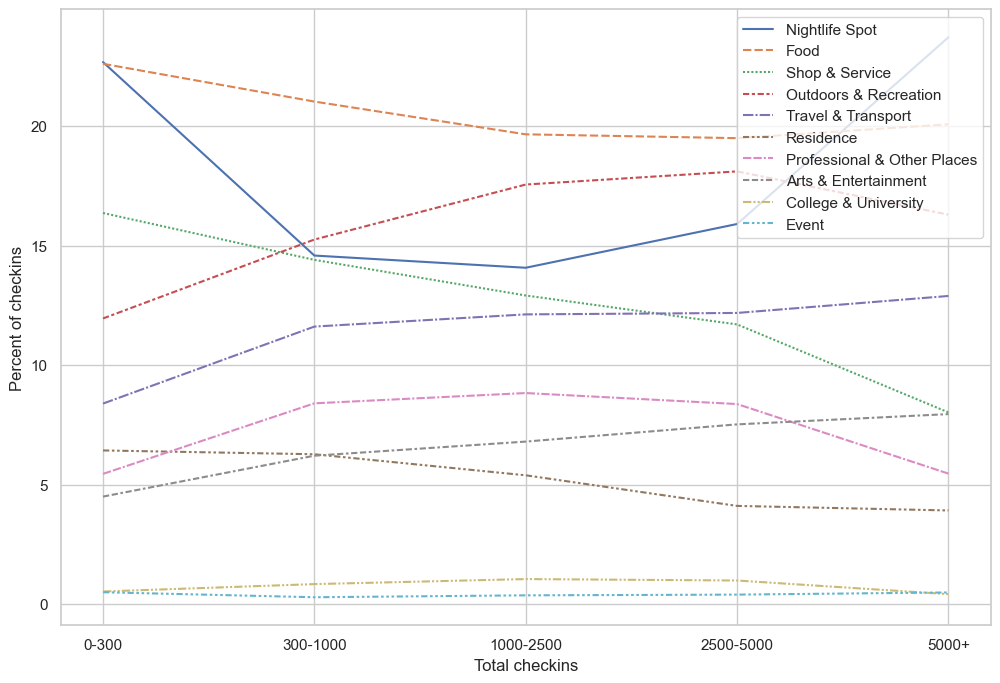

primary retail venue

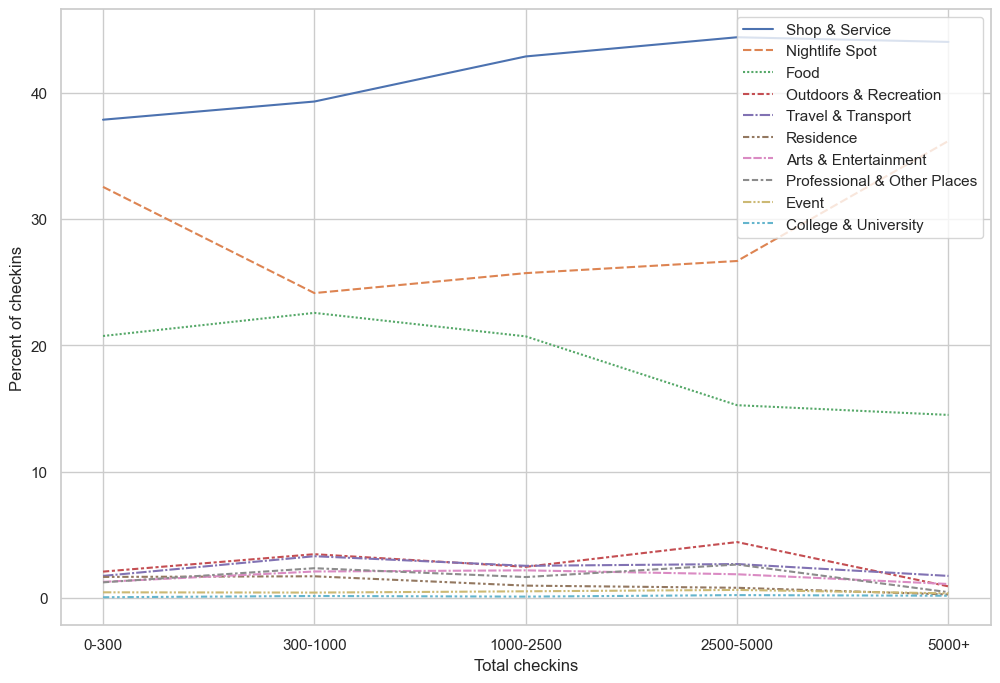

category venue

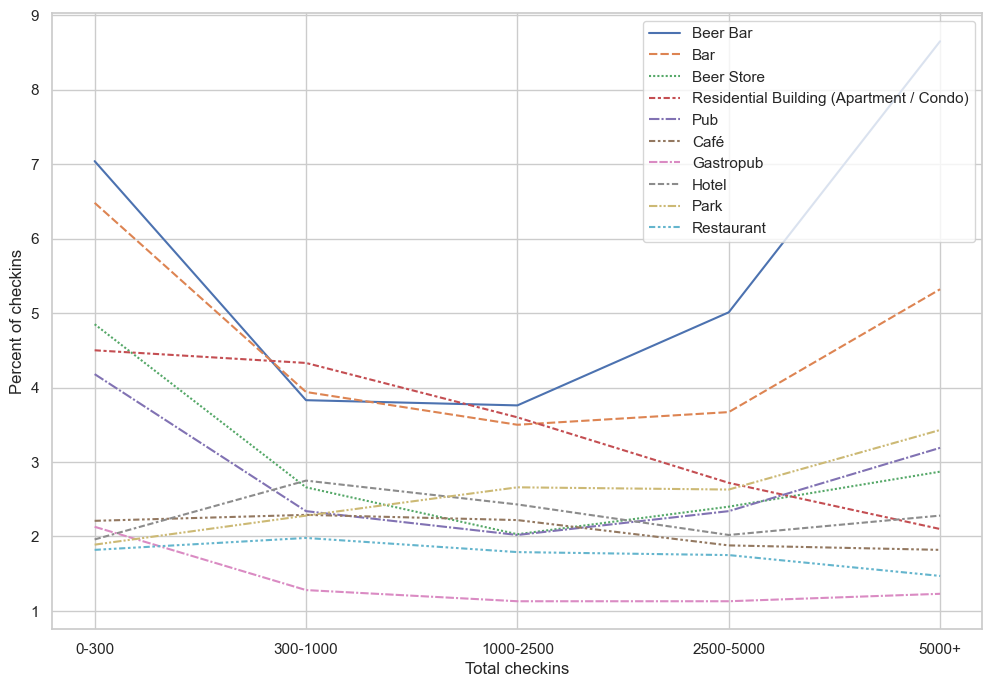

category retail venue

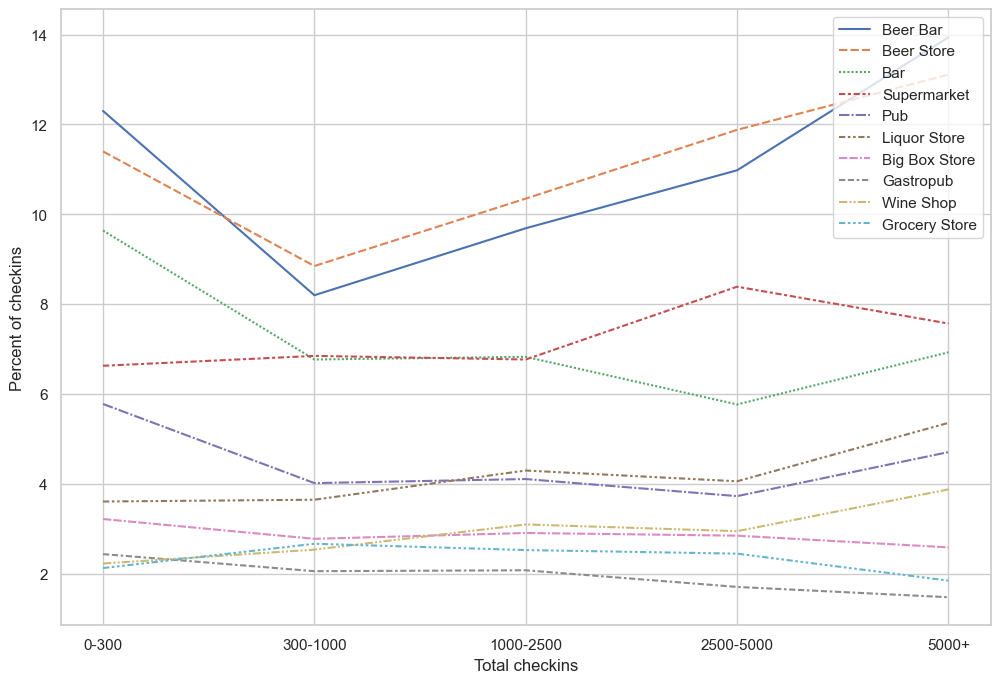